# 1.Description du premier modèle

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import geom

1-  Le nombres d'états: 3.
    La taille du vecteur de probabilités initiale: 3
    La taille de la matrice de transition: 3^3 = 9

In [2]:
# 2 - vecteur de probabilité ititiale:
pi0 = np.array((0.9, 0.1, 0))
pi0

array([0.9, 0.1, 0. ])

In [3]:
# 3- Matrice de transition A
A = np.array(((0.92, 0.08, 0), (0, 0.93, 0.07), (0, 0, 1)))
A

array([[0.92, 0.08, 0.  ],
       [0.  , 0.93, 0.07],
       [0.  , 0.  , 1.  ]])

In [4]:
# 4- Verifier si matrice stochastique
def verifStocas(M):
    for i in range(len(M)):
        if np.sum(M[i]) != 1:
            return False
    return True

In [5]:
verifStocas(A)

True

# 1.1 Distribution théorique

In [7]:
# 1 - Calculer pi1:
# pi1 = pi0 * A = [0.9 * 0.92, 0.1 * 0.08 + 0.1 * 0.93, 0]
# pi1 = [0.828, 0.101, 0]

In [8]:
# 2 - calculer pi2:
# pi2 = pi1 * A = pi0 * A^2 = [0.828, 0.101, 0] * A^2
# pi2 = [0.76176, 0.08713, 0]

In [9]:
# 3 - clacuter pit entre 1 et 200
def distTheorique(n, pi0, M):
    res = []
    for i in range(1, n+1):
        pi1 =  np.dot(pi0, M)
        res.append(pi1)
        pi0 = pi1
    return np.array(res)

In [10]:
distribution = distTheorique(200, pi0, A)
distribution

array([[8.28000000e-01, 1.65000000e-01, 7.00000000e-03],
       [7.61760000e-01, 2.19690000e-01, 1.85500000e-02],
       [7.00819200e-01, 2.65252500e-01, 3.39283000e-02],
       [6.44753664e-01, 3.02750361e-01, 5.24959750e-02],
       [5.93173371e-01, 3.33138129e-01, 7.36885003e-02],
       [5.45719501e-01, 3.57272330e-01, 9.70081693e-02],
       [5.02061941e-01, 3.75920827e-01, 1.22017232e-01],
       [4.61896986e-01, 3.89771324e-01, 1.48331690e-01],
       [4.24945227e-01, 3.99439090e-01, 1.75615683e-01],
       [3.90949609e-01, 4.05473972e-01, 2.03576419e-01],
       [3.59673640e-01, 4.08366763e-01, 2.31959597e-01],
       [3.30899749e-01, 4.08554980e-01, 2.60545271e-01],
       [3.04427769e-01, 4.06428112e-01, 2.89144119e-01],
       [2.80073547e-01, 4.02332365e-01, 3.17594087e-01],
       [2.57667664e-01, 3.96574984e-01, 3.45757353e-01],
       [2.37054251e-01, 3.89428148e-01, 3.73517602e-01],
       [2.18089911e-01, 3.81132518e-01, 4.00777572e-01],
       [2.00642718e-01, 3.71900

Text(0.5, 1.0, 'Repartition theorique des effectifs')

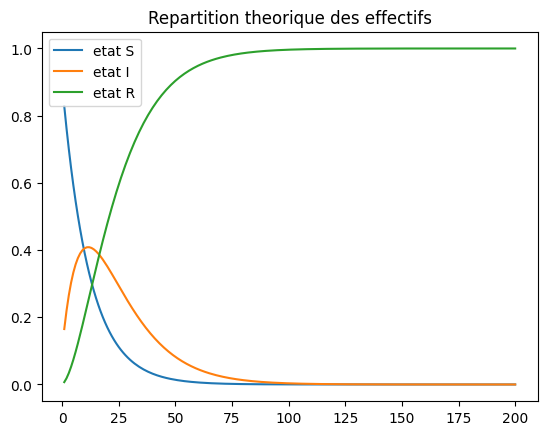

In [11]:
# 4 - Representation graphique  1 < t < 200
plt.figure()
plt.plot(list(range(1, 201)), distribution[:, 0], label='etat S')
plt.plot(list(range(1, 201)), distribution[:, 1], label='etat I')
plt.plot(list(range(1, 201)), distribution[:, 2], label='etat R')
plt.legend()
plt.title("Repartition theorique des effectifs")

In [12]:
# On observe que la probabilités de S et I converge vers 0 à partir de
# t = 50 pour S et t = 100 pour I, tandis que la probabilité de R
# converge vers 1, car si on est dand létat guéri, on reste dans cette 
# état avec un eprobabilité de 1

# 1.2 Distribution observée

# 1.2.1 Tirage aléatoire des états

In [13]:
def genAlea(T, pi0, M):
    res = [np.random.choice([0, 1, 2], p = pi0)]
    pi0 = M[res[0]]
    for i in range(1, T):
        res.append(np.random.choice([0, 1, 2], p = M[res[i - 1]]))
    
    return np.array(res)
    

In [14]:
genAlea(150, pi0, A)

array([0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# 1.2.2 Modélisation d’une population

In [15]:
#1 - L'evolution du nombre d'individus dans les trois etats:
listIndividu = np.array([genAlea(150, pi0, A) for _ in range(200)])
listIndividu

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

In [16]:
def evolutionIndividus(n, T, pi0, A):
    listIndividu = np.array([genAlea(T, pi0, A) for _ in range(n)])
    evolSain = []
    evolInfecte = []
    evolGueri = []
    
    for i in range(T):
        evolInfecte.append(np.sum(listIndividu[:, i] == 1))
        evolGueri.append(np.sum(listIndividu[:, i] == 2))
        evolSain.append(n - evolInfecte[i] - evolGueri[i])
        
    return np.array(evolSain), np.array(evolInfecte), np.array(evolGueri)

Text(0.5, 1.0, 'Distribution observe sur une population de 200 individus')

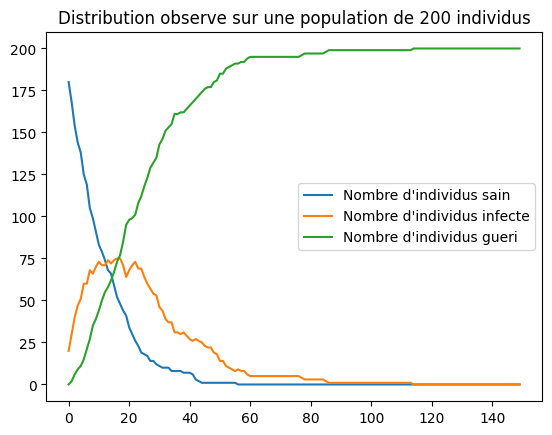

In [17]:
evolSain, evolInfecte,evolGueri = evolutionIndividus(200, 150, pi0, A)

plt.figure()
plt.plot(list(range(150)), evolSain, label="Nombre d'individus sain")
plt.plot(list(range(150)), evolInfecte, label="Nombre d'individus infecte")
plt.plot(list(range(150)), evolGueri, label="Nombre d'individus gueri")
plt.legend()
plt.title("Distribution observe sur une population de 200 individus")

On observe que le nombre d'effectifs de S et I converge vers 0 à partir de t = 50 pour S et t = 100 pour I, tandis que celui de R converge vers 200(le nombre total des individus), car si on est dand l'état guéri, on reste dans cette état avec une probabilité de 1

Text(0.5, 1.0, 'Distribution observe sur une population de 200 individus')

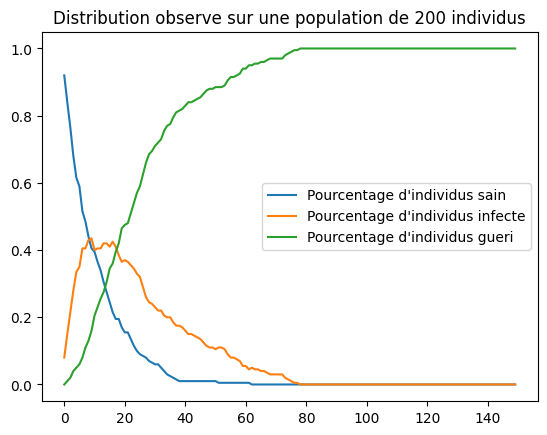

In [380]:
# 2 - Pourcentage
evolSain, evolInfecte,evolGueri = evolutionIndividus(200, 150, pi0, A)

evolSain =  evolSain * 1. / 200.
evolInfecte = evolInfecte * 1. / 200.
evolGueri = evolGueri * 1. / 200.

plt.figure()
plt.plot(list(range(150)), evolSain, label="Pourcentage d'individus sain")
plt.plot(list(range(150)), evolInfecte, label="Pourcentage d'individus infecte")
plt.plot(list(range(150)), evolGueri, label="Pourcentage d'individus gueri")
plt.legend()
plt.title("Distribution observe sur une population de 200 individus")

On observe que la probabilités de S et I converge vers 0 à partir de  t= 50 pour S et t = 100 pour I, tandis que la probabilité de R converge vers 1, car si on est dand létat guéri, on reste dans cette état avec une probabilité de 1, c'est ce qui ressemble à la distribution théorique

In [18]:
# 3 - Quand t est grand:
# sain = 0, infecte = 0, gueri = 1

Text(0.5, 1.0, 'Distribution observe sur une population de 5 individus')

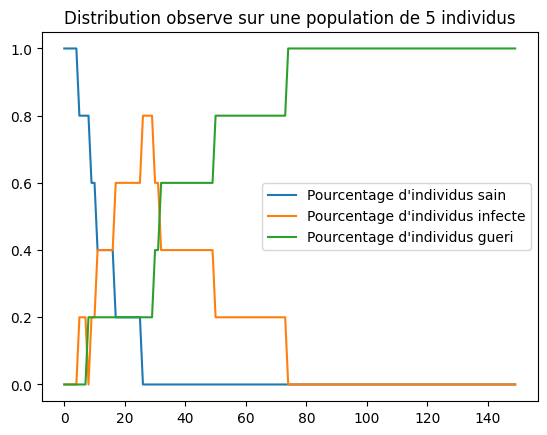

In [19]:
# 4 - Nombre d'individus = 5
evolSain, evolInfecte,evolGueri = evolutionIndividus(5, 150, pi0, A)

evolSain =  evolSain * 1. / 5.
evolInfecte = evolInfecte * 1. / 5.
evolGueri = evolGueri * 1. / 5.

plt.figure()
plt.plot(list(range(150)), evolSain, label="Pourcentage d'individus sain")
plt.plot(list(range(150)), evolInfecte, label="Pourcentage d'individus infecte")
plt.plot(list(range(150)), evolGueri, label="Pourcentage d'individus gueri")
plt.legend()
plt.title("Distribution observe sur une population de 5 individus")

Text(0.5, 1.0, 'Distribution observe sur une population de 5000 individus')

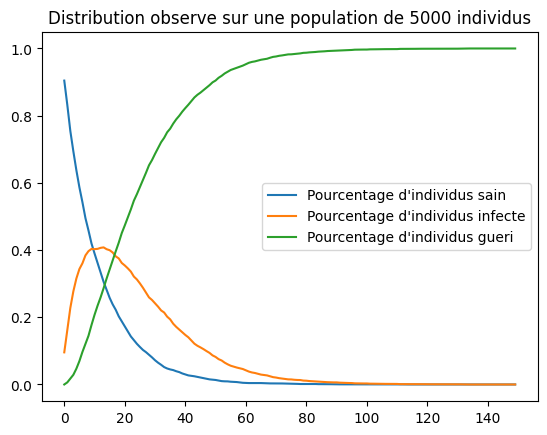

In [20]:
# 4 - Nombre d'individus = 5000
evolSain, evolInfecte,evolGueri = evolutionIndividus(5000, 150, pi0, A)

evolSain =  evolSain * 1. / 5000.
evolInfecte = evolInfecte * 1. / 5000.
evolGueri = evolGueri * 1. / 5000.

plt.figure()
plt.plot(list(range(150)), evolSain, label="Pourcentage d'individus sain")
plt.plot(list(range(150)), evolInfecte, label="Pourcentage d'individus infecte")
plt.plot(list(range(150)), evolGueri, label="Pourcentage d'individus gueri")
plt.legend()
plt.title("Distribution observe sur une population de 5000 individus")

On observe que le processus converge toujours vers le méme état meme si on change le nombre d'individu.
Donc la probabilité stationnaire est indépendante du nombre d'individu

# 1.3 Longueur de l'infection

In [21]:
# 1- Estimation de la Longueur moyenne d'une séquence de I
def moyenneObservee(n, T, pi0, A):
    listIndividus = np.array([genAlea(T, pi0, A) for _ in range(n)])
    
    return np.sum(listIndividus == 1) /  n * 1.
        

In [22]:
moyenneObservee(200, 150, pi0, A)

15.85

In [23]:
# 2- Calculer la Longeur theorique:
# la loi géométrique représente le nombre d'étapes nécessaires pour passer d'un état infecté à un état guéri, avec une 
# probabilité de succès p=0.07
# moyenne = E(x) = 1/p = 1/0.07=14.285

In [24]:
# 3- D'aprés les deux questions précédentes,  la longueur moyenne observée est proche de la longueur théorique attendue,
# cela signifie une bonne adéquation du modèle au données observées

In [25]:
# 4- Affichage de la longueur observée
listIndividus = np.array([genAlea(150, pi0, A) for _ in range(200)])

def distMoyenneObservee():
    return np.array([np.sum(listIndividus[i] == 1) for i in range(len(listIndividus))])

In [26]:
distObs = distMoyenneObservee()

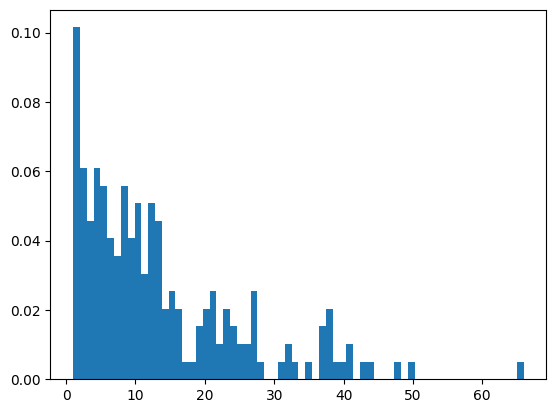

In [27]:
plt.figure()
plt.hist(distObs, bins=np.max(distObs), density=True);

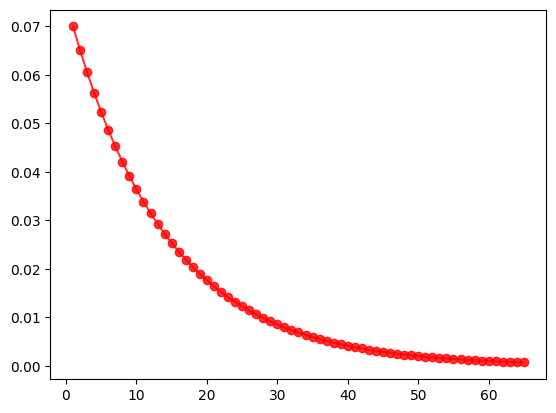

In [28]:
x = np.arange(1, max(distObs))
prob = geom.pmf(x, 0.07)
plt.plot(x, prob, "-o", label='Distribution théorique', color="red", alpha=0.8);

In [29]:
def affichage(nb_individus):
    listIndividus = np.array([genAlea(150, pi0, A) for _ in range(nb_individus)])
    distObs = [np.sum(listIndividus[i] == 1) for i in range(len(listIndividus))]
    plt.hist(distObs, bins=np.max(distObs), alpha=0.7, label='Distribution obs', density=True)
    x = np.arange(1, max(distObs))
    prob = geom.pmf(x, 0.07)
    plt.plot(x, prob, "-o", label='Distribution théorique')
    plt.axvline(14.285, color='red', linewidth=1.5, label='Moyenne théorique')
    plt.axvline(np.sum(listIndividus == 1) /  nb_individus * 1., color='blue', linewidth=1.5, label='Moyenne observée')
    plt.legend()

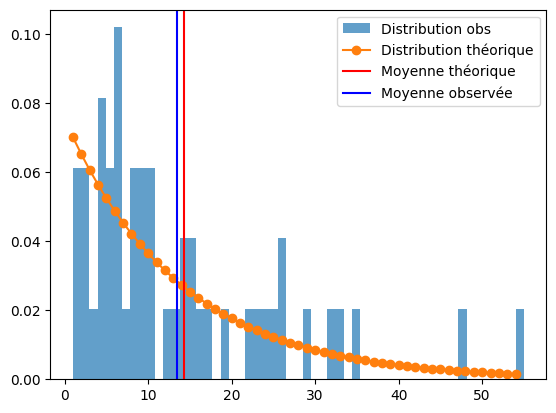

In [30]:
affichage(50)

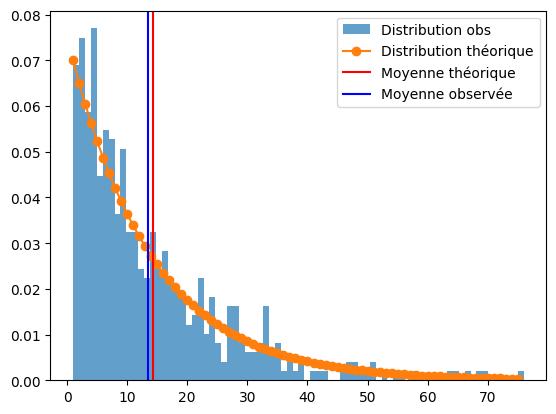

In [31]:
affichage(500)

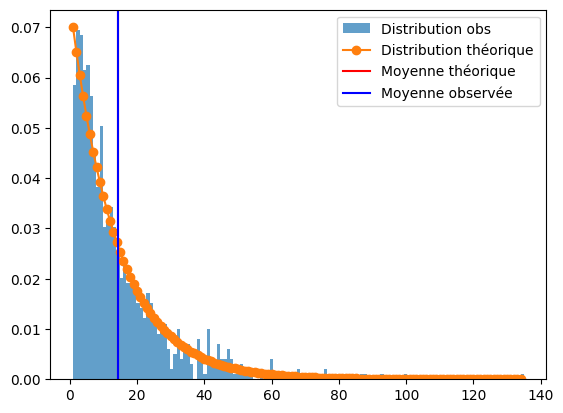

In [32]:
affichage(1000)

On observe que la distribution théorique et observée de la longueur de l'infection sont proches et pareil pour la longueur moyenne observée la longueur théorique, qe qui signifie une bonne adéquation du modèle au données observées

# 1.4 Apprentissage des paramètres du modèle à partir de données

In [33]:
listIndividus = np.array([genAlea(150, pi0, A) for _ in range(1000)])

In [34]:
# 1 - Estimation de la matrice
def estimationParams(sequence):
    etats = [0, 1, 2]
    transitionCounts = {etat: {e: 0 for e in etats} for etat in etats}
    
    for i in range(len(sequence) - 1):
        etatCurr = sequence[i]
        etatNext = sequence[i + 1]
        transitionCounts[etatCurr][etatNext] += 1
    
    matrice = np.zeros((3, 3))
    for i in range(3):
        etat = etats[i]
        etatCount = sum(transitionCounts[etat].values())
        if etatCount > 0:
            for j in range(3):
                etatNext = etats[j]
                transition_prob = transitionCounts[etat][etatNext] / etatCount
                matrice[i][j] = transition_prob
    return matrice

In [35]:
estimationParams(listIndividus[0])

array([[0.85714286, 0.14285714, 0.        ],
       [0.        , 0.9       , 0.1       ],
       [0.        , 0.        , 1.        ]])

In [36]:
# 2 - Estimation de la matrice
def estimationParams2(sequences):
    etats = [0, 1, 2]
    transitionCounts = {etat: {e: 0 for e in etats} for etat in etats}
    
    for sequence in sequences:
        for i in range(len(sequence) - 1):
            etatCurr = sequence[i]
            etatNext = sequence[i + 1]
            transitionCounts[etatCurr][etatNext] += 1
    
    matrice = np.zeros((3, 3))
    for i in range(3):
        etat = etats[i]
        etatCount = sum(transitionCounts[etat].values())
        if etatCount > 0:
            for j in range(3):
                etatNext = etats[j]
                transition_prob = transitionCounts[etat][etatNext] / etatCount
                matrice[i][j] = transition_prob
    return matrice

In [37]:
estimationParams2(listIndividus[0:10])

array([[0.91208791, 0.08791209, 0.        ],
       [0.        , 0.9378882 , 0.0621118 ],
       [0.        , 0.        , 1.        ]])

In [38]:
estimationParams2(listIndividus[0:100])

array([[0.92115385, 0.07884615, 0.        ],
       [0.        , 0.9327505 , 0.0672495 ],
       [0.        , 0.        , 1.        ]])

In [39]:
estimationParams2(listIndividus[0:200])

array([[0.92509855, 0.07490145, 0.        ],
       [0.        , 0.92849482, 0.07150518],
       [0.        , 0.        , 1.        ]])

In [40]:
estimationParams2(listIndividus[0:300])

array([[0.92680148, 0.07319852, 0.        ],
       [0.        , 0.93255396, 0.06744604],
       [0.        , 0.        , 1.        ]])

In [41]:
estimationParams2(listIndividus[0:400])

array([[0.92226466, 0.07773534, 0.        ],
       [0.        , 0.93062782, 0.06937218],
       [0.        , 0.        , 1.        ]])

In [42]:
# 3-  Il faut plus de 200 Sequences pour approximer le modèle

# 2. Description du second modèle

# 2.1 Analyse du modèle

1- Oui, ce processus peut toujours être modélisé par une chaîne de Markov, même avec l'introduction de la possibilité pour les individus guéris de redevenir sains. Chaque étape de ce processus dépend uniquement de l'état actuel et suit la propriété de Markov, où la transition vers l'état suivant est entièrement déterminée par l'état présent, ce qui le rend modélisable par une chaîne de Markov.

In [43]:
# 2 - Nouvelle matrice de transision:
A = np.array(((0.92, 0.08, 0), (0, 0.93, 0.07), (0.02, 0, 0.98)))
A

array([[0.92, 0.08, 0.  ],
       [0.  , 0.93, 0.07],
       [0.02, 0.  , 0.98]])

In [44]:
#3- La nature des états de la chaine de markov:
#    - La périodicité: puisque il existe une self loop sur T alors la chaine n'est pas périodique
#    - L'irréductibilité: étant donné que chaque état peut être atteint à partir de n'importe quel autre état, la chaîne est 
#      irréductible. Tous les états sont communicants entre eux (la chaine est fortement connexe)

In [45]:
A2 = np.dot(A, A)
A2 # elle est bien stochastique

array([[0.8464, 0.148 , 0.0056],
       [0.0014, 0.8649, 0.1337],
       [0.038 , 0.0016, 0.9604]])

In [46]:
A3 = np.dot(A2, A)
A3

array([[0.7788  , 0.205352, 0.015848],
       [0.003962, 0.804469, 0.191569],
       [0.054168, 0.004528, 0.941304]])

In [47]:
A4 = np.dot(A3, A)
A4

array([[0.71681296, 0.25328136, 0.02990568],
       [0.00747642, 0.74847313, 0.24405045],
       [0.06866064, 0.00854448, 0.92279488]])

In [48]:
# Elles sont toutes stochastiques car la somme de chacunes des lignes est égal à 1

In [49]:
# 5 - Nouvelles simulations

In [50]:
listIndividu = np.array([genAlea(150, pi0, A) for _ in range(200)])
listIndividu

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [0, 0, 1, ..., 2, 2, 2],
       [1, 1, 2, ..., 2, 2, 2]])

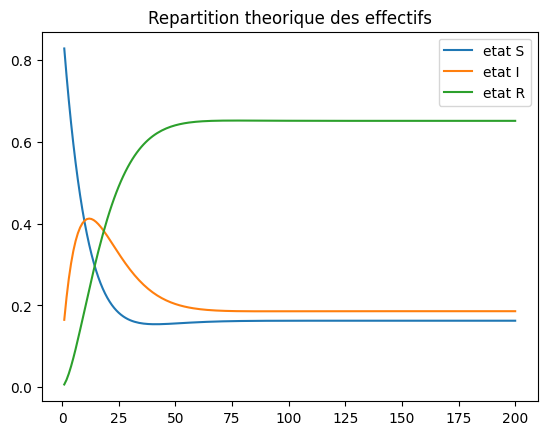

In [51]:
distribution = distTheorique(200, pi0, A)
plt.figure()
plt.plot(list(range(1, 201)), distribution[:, 0], label='etat S')
plt.plot(list(range(1, 201)), distribution[:, 1], label='etat I')
plt.plot(list(range(1, 201)), distribution[:, 2], label='etat R')
plt.legend()
plt.title("Repartition theorique des effectifs");

Text(0.5, 1.0, 'Distribution observe sur une population de 200 individus')

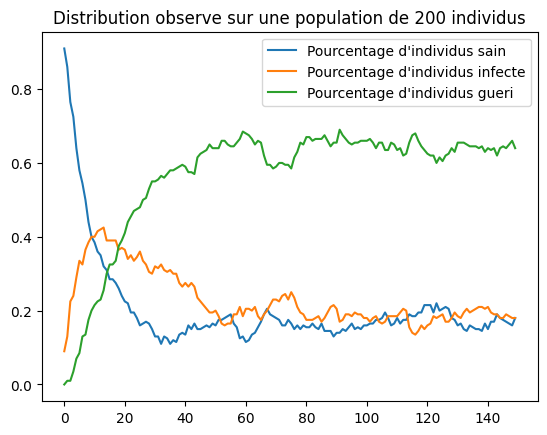

In [52]:
evolSain, evolInfecte,evolGueri = evolutionIndividus(200, 150, pi0, A)

evolSain =  evolSain * 1. / 200.
evolInfecte = evolInfecte * 1. / 200.
evolGueri = evolGueri * 1. / 200.

plt.figure()
plt.plot(list(range(150)), evolSain, label="Pourcentage d'individus sain")
plt.plot(list(range(150)), evolInfecte, label="Pourcentage d'individus infecte")
plt.plot(list(range(150)), evolGueri, label="Pourcentage d'individus gueri")
plt.legend()
plt.title("Distribution observe sur une population de 200 individus")

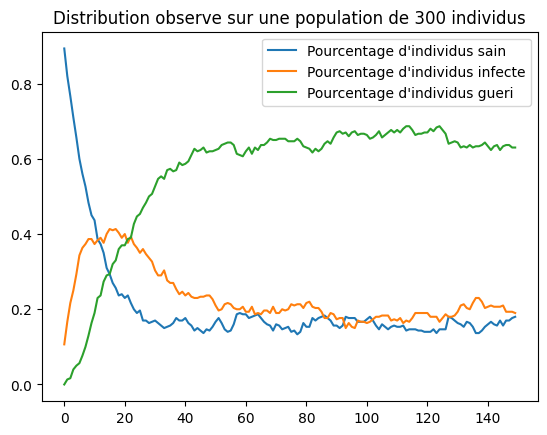

In [53]:
evolSain, evolInfecte,evolGueri = evolutionIndividus(300, 150, pi0, A)

evolSain =  evolSain * 1. / 300.
evolInfecte = evolInfecte * 1. / 300.
evolGueri = evolGueri * 1. / 300.

plt.figure()
plt.plot(list(range(150)), evolSain, label="Pourcentage d'individus sain")
plt.plot(list(range(150)), evolInfecte, label="Pourcentage d'individus infecte")
plt.plot(list(range(150)), evolGueri, label="Pourcentage d'individus gueri")
plt.legend()
plt.title("Distribution observe sur une population de 300 individus");

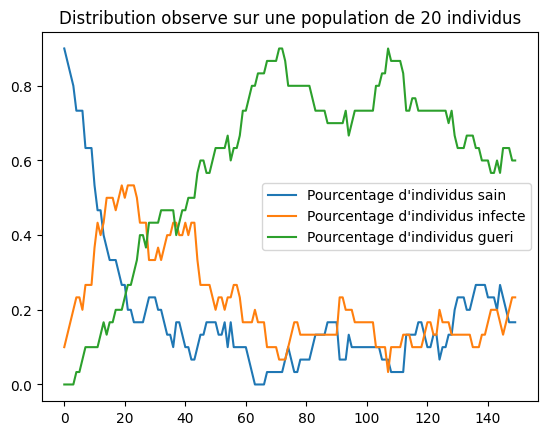

In [54]:
evolSain, evolInfecte,evolGueri = evolutionIndividus(30, 150, pi0, A)

evolSain =  evolSain * 1. / 30.
evolInfecte = evolInfecte * 1. / 30.
evolGueri = evolGueri * 1. / 30.

plt.figure()
plt.plot(list(range(150)), evolSain, label="Pourcentage d'individus sain")
plt.plot(list(range(150)), evolInfecte, label="Pourcentage d'individus infecte")
plt.plot(list(range(150)), evolGueri, label="Pourcentage d'individus gueri")
plt.legend()
plt.title("Distribution observe sur une population de 20 individus");

Initialement, la majorité des individus de la population sont sains, avec une petite minorité d'individus infectés. Au fil du temps, le nombre d'individus sains diminue progressivement, convergant ensuite vers environ 0.2. De même, la population d'individus infectés diminue progressivement pour converger également vers environ 0.2 à la fin de la simulation.

En revanche, la population d'individus guéris augmente progressivement au fil du temps, convergeant vers environ 0.6 vers la fin de la simulation. Cette augmentation reflète la récupération des individus infectés et leur transition vers l'état guéri, renforçant ainsi la proportion d'individus guéris dans la population.

In [55]:
# 7- prob initial = [0.5, 0.5, 0]
listIndividu = np.array([genAlea(150, [0.5, 0.5, 0], A) for _ in range(200)])

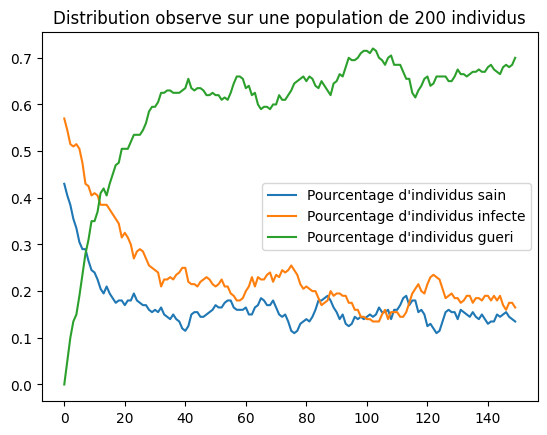

In [60]:
evolSain, evolInfecte,evolGueri = evolutionIndividus(200, 150, [0.5, 0.5, 0], A)

evolSain =  evolSain * 1. / 200.
evolInfecte = evolInfecte * 1. / 200.
evolGueri = evolGueri * 1. / 200.

plt.figure()
plt.plot(list(range(150)), evolSain, label="Pourcentage d'individus sain")
plt.plot(list(range(150)), evolInfecte, label="Pourcentage d'individus infecte")
plt.plot(list(range(150)), evolGueri, label="Pourcentage d'individus gueri")
plt.legend()
plt.title("Distribution observe sur une population de 200 individus");

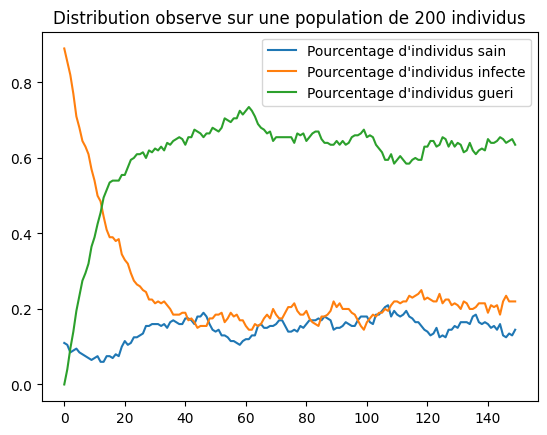

In [57]:
# 7- prob initial = [0.1, 0.9, 0]
evolSain, evolInfecte,evolGueri = evolutionIndividus(200, 150, [0.1, 0.9, 0], A)

evolSain =  evolSain * 1. / 200.
evolInfecte = evolInfecte * 1. / 200.
evolGueri = evolGueri * 1. / 200.

plt.figure()
plt.plot(list(range(150)), evolSain, label="Pourcentage d'individus sain")
plt.plot(list(range(150)), evolInfecte, label="Pourcentage d'individus infecte")
plt.plot(list(range(150)), evolGueri, label="Pourcentage d'individus gueri")
plt.legend()
plt.title("Distribution observe sur une population de 200 individus");

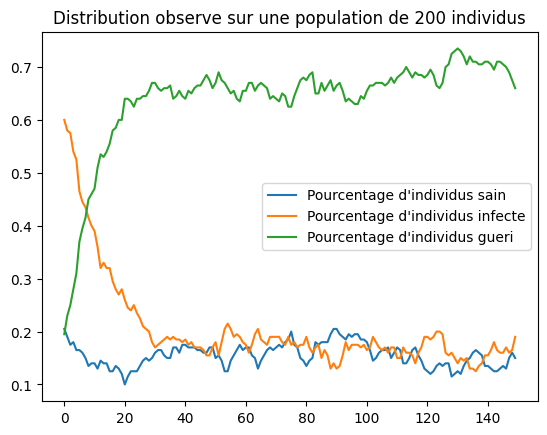

In [59]:
# 7- prob initial = [0.2, 0.6, 0.2]
evolSain, evolInfecte,evolGueri = evolutionIndividus(200, 150, [0.2, 0.6, 0.2], A)

evolSain =  evolSain * 1. / 200.
evolInfecte = evolInfecte * 1. / 200.
evolGueri = evolGueri * 1. / 200.

plt.figure()
plt.plot(list(range(150)), evolSain, label="Pourcentage d'individus sain")
plt.plot(list(range(150)), evolInfecte, label="Pourcentage d'individus infecte")
plt.plot(list(range(150)), evolGueri, label="Pourcentage d'individus gueri")
plt.legend()
plt.title("Distribution observe sur une population de 200 individus");

Même si les probabilités initiales influencent le début de l'évolution de la population, la tendance vers laquelle la population converge à long terme reste généralement constante. Autrement dit, les premières étapes peuvent varier en fonction des conditions initiales, mais la dynamique finale de la population, déterminée par les transitions entre les états, reste souvent stable, conduisant à une convergence similaire vers des proportions finales spécifiques d'individus sains, infectés et guéris.

In [422]:
eigenvalues, eigenvectors = np.linalg.eig(A.T)
indice_stationnaire = np.argmin(abs(eigenvalues - 1.0))
distribution_stationnaire = np.real(eigenvectors[:, indice_stationnaire])
distribution_stationnaire /= np.sum(distribution_stationnaire)

print("Distribution de probabilité stationnaire : ", distribution_stationnaire)

Distribution de probabilité stationnaire :  [0.1627907  0.18604651 0.65116279]



7-Les observations des graphiques montrent que les probabilités des états (sain, infecté, guéri) convergent presque vers des valeurs similaires à celles de la distribution stationnaire prédite. Cela suggère que la population atteint progressivement un équilibre où les proportions d'individus dans chaque état se stabilisent autour des valeurs attendues dans la distribution stationnaire.

# 2.2. Longeur de l'immunité

In [61]:
#1- La moyenne estimée d'une séquence de R
def moyenneObserveeR(n, T, pi0, A, listIndividus):
    somme = 0
    
    for i in range(len(listIndividus)):
        first_indice = np.argmax(listIndividus[i] == 2)
        seq = listIndividus[i, first_indice:]
        end_indice = np.argmax(seq != 2)
        length = end_indice if end_indice != 0 else len(seq)
        somme += length
    
    return somme / n *1.

In [62]:
listIndividus = np.array([genAlea(150, pi0, A) for _ in range(200)])
moyenneObserveeR(200, 150, pi0, A, listIndividus)

44.64

In [63]:
#2- LA moyenne théorique d'une séquence de R
# la loi géométrique représente le nombre d'étapes nécessaires pour passer d'un état guéri à un état sain, avec une 
# probabilité de succès p=0.02
# moyenne = E(x) = 1/p = 1/0.02=50.0

In [64]:
#3- Affichage
def distObserveeR(n, T, pi0, A, listIndividus):
    somme = []
    
    for i in range(len(listIndividus)):
        first_indice = np.argmax(listIndividus[i] == 2)
        seq = listIndividus[i, first_indice:]
        end_indice = np.argmax(seq != 2)
        length = end_indice if end_indice != 0 else len(seq)
        somme.append(length)
    return np.array(somme)

In [65]:
def affichage2(nb_individus):
    listIndividus = np.array([genAlea(150, pi0, A) for _ in range(nb_individus)])
    distObs = distObserveeR(nb_individus, 150, pi0, A, listIndividus)
    plt.hist(distObs, bins=np.max(distObs), alpha=0.7, label='Distribution obs', density=True)
    x = np.arange(1, max(distObs))
    prob = geom.pmf(x, 0.02)
    plt.plot(x, prob, "-o", label='Distribution théorique')
    plt.legend()

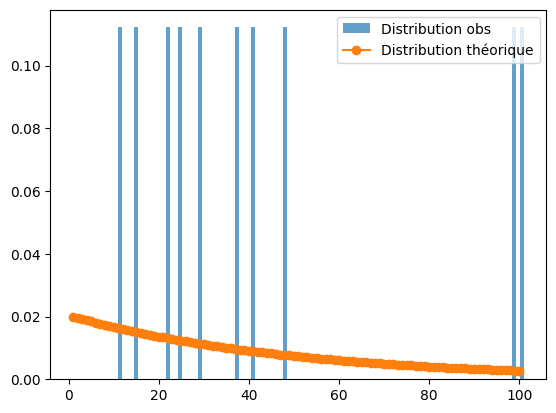

In [67]:
affichage2(10)

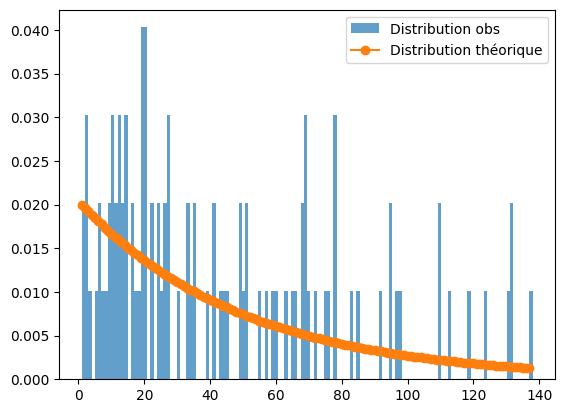

In [68]:
affichage2(100)

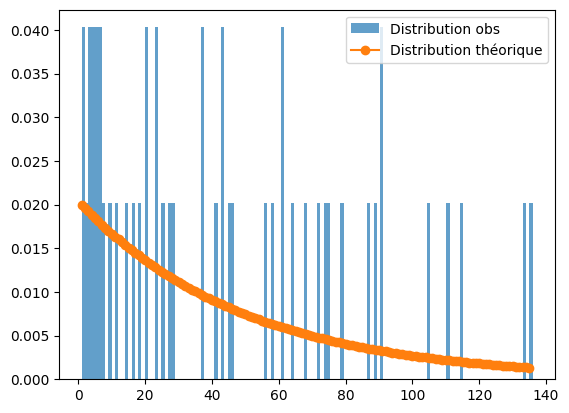

In [69]:
affichage2(50)

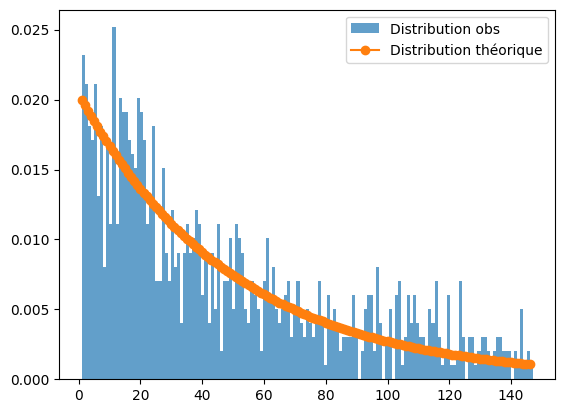

In [70]:
affichage2(1000)

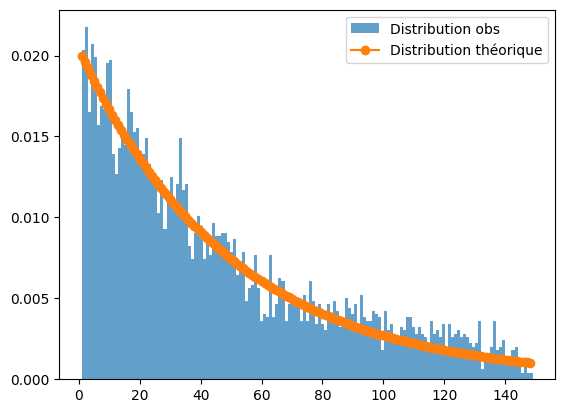

In [71]:
affichage2(5000)

# 2.3. Modifier le modèle

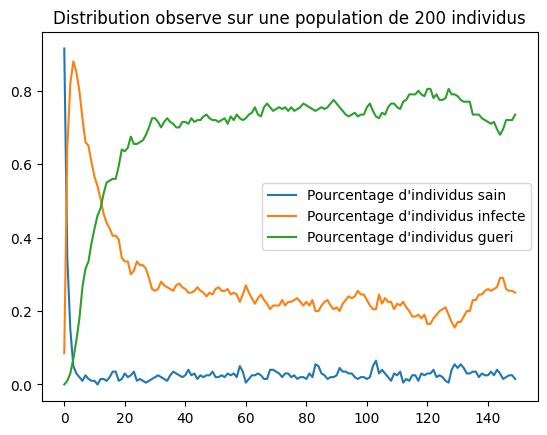

In [72]:
#1- sain -> infecté : 0.6
A = np.array(((0.4, 0.6, 0), (0, 0.93, 0.07), (0.02, 0, 0.98)))
evolSain, evolInfecte,evolGueri = evolutionIndividus(200, 150, pi0, A)

evolSain =  evolSain * 1. / 200.
evolInfecte = evolInfecte * 1. / 200.
evolGueri = evolGueri * 1. / 200.

plt.figure()
plt.plot(list(range(150)), evolSain, label="Pourcentage d'individus sain")
plt.plot(list(range(150)), evolInfecte, label="Pourcentage d'individus infecte")
plt.plot(list(range(150)), evolGueri, label="Pourcentage d'individus gueri")
plt.legend()
plt.title("Distribution observe sur une population de 200 individus");

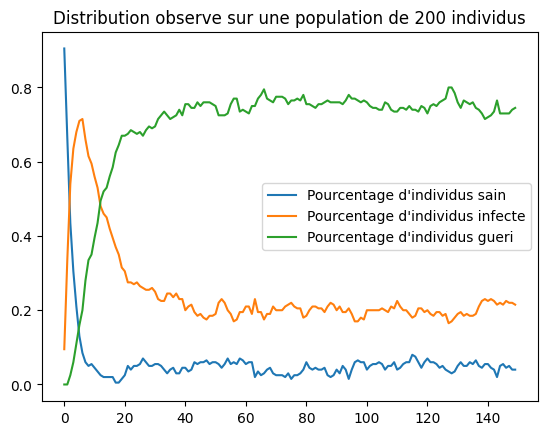

In [73]:
#1- sain -> infecté : 0.3
A = np.array(((0.7, 0.3, 0), (0, 0.93, 0.07), (0.02, 0, 0.98)))
evolSain, evolInfecte,evolGueri = evolutionIndividus(200, 150, pi0, A)

evolSain =  evolSain * 1. / 200.
evolInfecte = evolInfecte * 1. / 200.
evolGueri = evolGueri * 1. / 200.

plt.figure()
plt.plot(list(range(150)), evolSain, label="Pourcentage d'individus sain")
plt.plot(list(range(150)), evolInfecte, label="Pourcentage d'individus infecte")
plt.plot(list(range(150)), evolGueri, label="Pourcentage d'individus gueri")
plt.legend()
plt.title("Distribution observe sur une population de 200 individus");

Augmenter la probabilité pour un individu sain de devenir infecté accélére la propagation de l'épidémie et influence la distribution stationnaire des états (sain, infecté, guéri). Cela entraîne une augmentation du nombre d'individus infectés à long terme, modifiant ainsi les proportions d'individus dans chaque état.

In [74]:
# Distribution stationnaire
eigenvalues, eigenvectors = np.linalg.eig(A.T)
indice_stationnaire = np.argmin(abs(eigenvalues - 1.0))
distribution_stationnaire = np.real(eigenvectors[:, indice_stationnaire])
distribution_stationnaire /= np.sum(distribution_stationnaire)

print("Distribution de probabilité stationnaire : ", distribution_stationnaire)

Distribution de probabilité stationnaire :  [0.04929577 0.21126761 0.73943662]


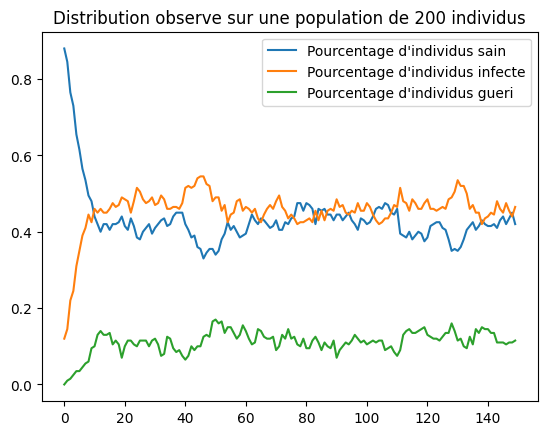

In [75]:
#2- #1- guéri -> sain: 0.3
A = np.array(((0.92, 0.08, 0), (0, 0.93, 0.07), (0.3, 0, 0.7)))
evolSain, evolInfecte,evolGueri = evolutionIndividus(200, 150, pi0, A)

evolSain =  evolSain * 1. / 200.
evolInfecte = evolInfecte * 1. / 200.
evolGueri = evolGueri * 1. / 200.

plt.figure()
plt.plot(list(range(150)), evolSain, label="Pourcentage d'individus sain")
plt.plot(list(range(150)), evolInfecte, label="Pourcentage d'individus infecte")
plt.plot(list(range(150)), evolGueri, label="Pourcentage d'individus gueri")
plt.legend()
plt.title("Distribution observe sur une population de 200 individus");

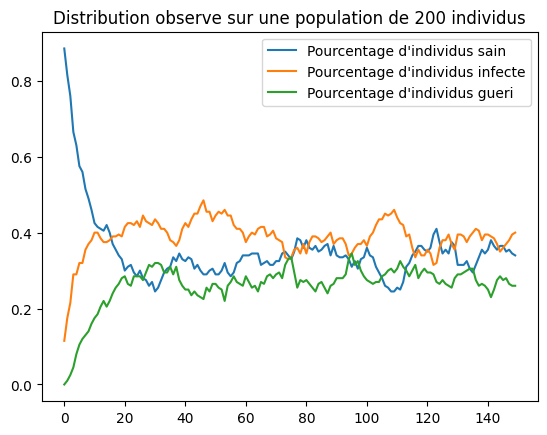

In [76]:
#2- #1- guéri -> sain: 0.1
A = np.array(((0.92, 0.08, 0), (0, 0.93, 0.07), (0.1, 0, 0.9)))
evolSain, evolInfecte,evolGueri = evolutionIndividus(200, 150, pi0, A)

evolSain =  evolSain * 1. / 200.
evolInfecte = evolInfecte * 1. / 200.
evolGueri = evolGueri * 1. / 200.

plt.figure()
plt.plot(list(range(150)), evolSain, label="Pourcentage d'individus sain")
plt.plot(list(range(150)), evolInfecte, label="Pourcentage d'individus infecte")
plt.plot(list(range(150)), evolGueri, label="Pourcentage d'individus gueri")
plt.legend()
plt.title("Distribution observe sur une population de 200 individus");

Une augmentation de la probabilité pour un individu guéri de redevenir sain réduit le nombre d'individus guéris à long terme et augmente le nombre d'individus sains. Cela pourrait potentiellement influencer la dynamique de l'épidémie en favorisant une augmentation des individus sains au détriment de ceux guéris.

In [77]:
# Distribution stationnaire
eigenvalues, eigenvectors = np.linalg.eig(A.T)
indice_stationnaire = np.argmin(abs(eigenvalues - 1.0))
distribution_stationnaire = np.real(eigenvectors[:, indice_stationnaire])
distribution_stationnaire /= np.sum(distribution_stationnaire)

print("Distribution de probabilité stationnaire : ", distribution_stationnaire)

Distribution de probabilité stationnaire :  [0.33980583 0.38834951 0.27184466]


# 3.Vaccination

# 3.1Questions rapides

1- La vaccination a modifier les états inféctés et sain, en effet cela
a augmenter la probabilité de passer d'infecté à guéri. Donc on a plus de chance de guérir de l'épidémie en étant infecté. De plus on peut vacciner une personne saine sans qu'elle soit infectée.

In [78]:
MatriceVaccin = np.array([[0.9 , 0.01, 0.09], [0. , 0.8 , 0.2 ], [0.02, 0. , 0.98]])

In [79]:
#2-  la distribution théorique
distribution = distTheorique(200, pi0,MatriceVaccin)

Text(0.5, 1.0, 'Repartition theorique des effectifs')

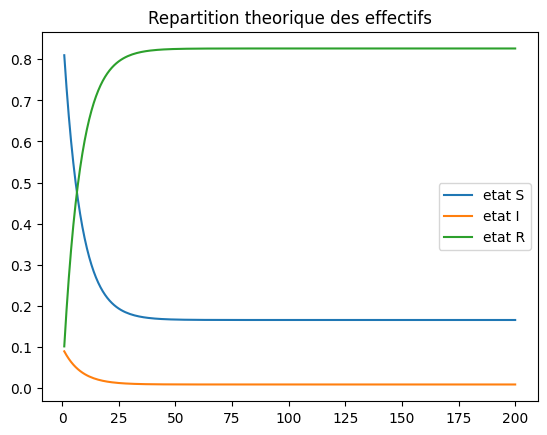

In [80]:
plt.figure()
plt.plot(list(range(1, 201)), distribution[:, 0], label='etat S')
plt.plot(list(range(1, 201)), distribution[:, 1], label='etat I')
plt.plot(list(range(1, 201)), distribution[:, 2], label='etat R')
plt.legend()
plt.title("Repartition theorique des effectifs")

Nous pouvons observer que la répartition théorique des effectifs a changé. En effet, nous avons plus de personnes guéries et que pour les infectés la répartition converge vers 0. 

In [81]:
# Distribution stationnaire
A = np.array(((0.92, 0.08, 0), (0, 0.93, 0.07), (0.02, 0, 0.98)))
eigenvalues, eigenvectors = np.linalg.eig(A.T)
indice_stationnaire = np.argmin(abs(eigenvalues - 1.0))
distribution_stationnaire2 = np.real(eigenvectors[:, indice_stationnaire])
distribution_stationnaire2 /= np.sum(distribution_stationnaire2)

print("Distribution de probabilité stationnaire : ", distribution_stationnaire2)

Distribution de probabilité stationnaire :  [0.1627907  0.18604651 0.65116279]


In [82]:
# Distribution stationnaire
eigenvalues, eigenvectors = np.linalg.eig(MatriceVaccin.T)
indice_stationnaire = np.argmin(abs(eigenvalues - 1.0))
distribution_stationnaireVac = np.real(eigenvectors[:, indice_stationnaire])
distribution_stationnaireVac /= np.sum(distribution_stationnaireVac)

print("Distribution de probabilité stationnaire : ", distribution_stationnaireVac)

Distribution de probabilité stationnaire :  [0.16528926 0.00826446 0.82644628]


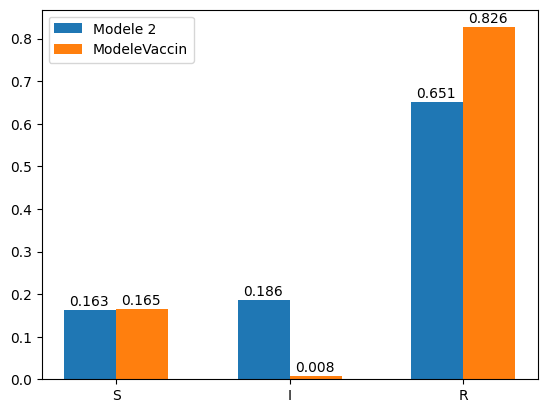

In [83]:
plt.figure()
plt.bar([1- 0.3/2, 2 - 0.3/2, 3-0.3/2], distribution_stationnaire2, width=0.3, linewidth = 2, label="Modele 2")
plt.bar([1+ 0.3/2, 2 + 0.3/2, 3+0.3/2], distribution_stationnaireVac, width=0.3, linewidth = 2, label="ModeleVaccin")
plt.legend()
plt.xticks([1, 2, 3], ["S", "I", "R"])
for i, value in enumerate(distribution_stationnaire2):
    plt.text(i+1 - 0.3/2 - 0.12, value+0.01, str(round(value, 3)))
    
for i, value in enumerate(distribution_stationnaireVac):
    plt.text(i+1 + 0.3/2 - 0.12, value+0.01, str(round(value, 3)))
plt.show()

# 3.2.Classification

In [84]:
def probSeq(sequence,A,pi0):

    # Initialisation de la probabilité
    proba = pi0[sequence[0]]

    # Calcul de la probabilité de la séquence
    for t in range(1, len(sequence)):
        proba*= A[sequence[t-1], sequence[t]]
    return proba


In [87]:
pi0 = np.array((0.9, 0.1, 0))
A = np.array(((0.92, 0.08, 0), (0, 0.93, 0.07), (0.02, 0, 0.98)))
MatriceVaccin = np.array([[0.9 , 0.01, 0.09], [0. , 0.8 , 0.2 ], [0.02, 0. , 0.98]])
sequence = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

print(" la probabilité d’obtenir cette séquence sachant le modèle 2 : ",probSeq(sequence,A,pi0))
print(" la probabilité d’obtenir cette séquence sachant le modèle vaccin : ",probSeq(sequence,MatriceVaccin,pi0))

 la probabilité d’obtenir cette séquence sachant le modèle 2 :  1.4588077550263051e-10
 la probabilité d’obtenir cette séquence sachant le modèle vaccin :  1.4200531482213664e-12


Nous observons que la probabilité selon le modèle 2 est légèrement plus élevée que celle selon le modèle vaccin. Cela pourrait indiquer que, selon ces modèles et la séquence observée, l'individu n'a pas été vacciné.

# 4.Confinement

In [89]:

def simulate_containment(transition_matrix, containment_matrix, initial_state, population, duration, containment_threshold=0.25, exit_threshold=0.1):
    state = initial_state
    num_containments = 0
    num_uncontainments = 0
    initial_transition_matrix = transition_matrix
    timesconf = []  # Liste pour stocker les temps de chaque fin de confinement
    timesdeconf = []  # Liste pour stocker les temps de chaque fin de déconfinement
    infected_counts = []  # Liste pour stocker le nombre d'individus infectés à chaque instant
    recovered_counts = []  # Liste pour stocker le nombre d'individus guéris à chaque instant
    susceptible_counts = []  # Liste pour stocker le nombre d'individus sains à chaque instant

    for t in range(duration):
        # Calculer la probabilité de passer à chaque état
        probability_of_state_change = state.dot(transition_matrix)

        # Ajouter le nombre d'individus infectés, guéris et sains à chaque instant
        infected_counts.append(state[1] * population)
        recovered_counts.append(state[2] * population)
        susceptible_counts.append(state[0] * population)

        # Si le pourcentage d'individus infectés dépasse le seuil de confinement, passer à la matrice de confinement
        if state[1] > containment_threshold:
            if np.array_equal(transition_matrix, containment_matrix):
                num_containments += 1
            else:
                transition_matrix = containment_matrix
                timesconf.append(t)  # Noter le temps de confinement
        # Si le pourcentage d'individus infectés est inférieur au seuil de sortie, retourner à la matrice de transition initiale
        elif state[1] < exit_threshold:
            if np.array_equal(transition_matrix, initial_transition_matrix):
                num_uncontainments += 1
            else:
                transition_matrix = initial_transition_matrix
                timesdeconf.append(t)  # Noter le temps de déconfinement

        # Passer à l'état suivant en fonction de la probabilité de changement d'état
        state = np.random.multinomial(population, probability_of_state_change).astype(float) / population

        # Si aucun individu n'est infecté, sortir de la boucle
        if state[1] == 0:
            break


    return state, num_containments, num_uncontainments, infected_counts, recovered_counts,susceptible_counts,timesconf,timesdeconf

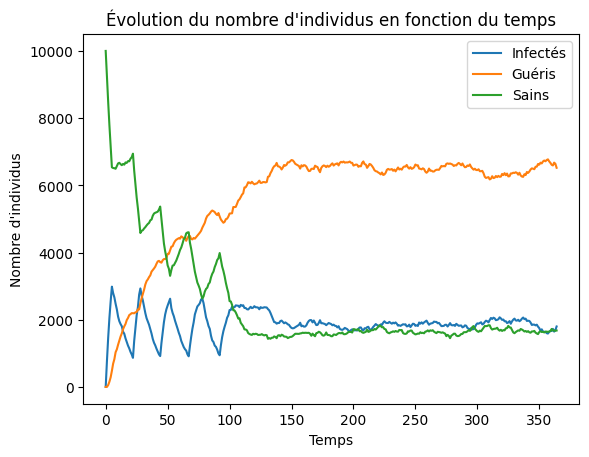

Nombre de confinements nécessaires : 8
Nombre de déconfinements nécessaires : 6
L'tat à la fin de l'épidémie [0.167 0.182 0.651]
les temps de confinement :  [4, 27, 51, 77]
les temps de déconfinement :  [21, 43, 66, 91]


In [90]:
# Paramètres de la simulation
transition_matrix = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
containment_matrix = np.array([[1, 0, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
initial_state = np.array([1, 0, 0])  # 100% de la population est saine au départ
initial_transition_matrix = transition_matrix  # Définir la matrice de transition initiale
population = 10000  # Taille de l'échantillon
duration = 365  # Durée de l'étude (en jours)

final_state, num_containments, num_uncontainments,infected_counts,recovered_counts,susceptible_counts,t_conf,t_deconf= simulate_containment(transition_matrix, containment_matrix, initial_state, population, duration)

# Afficher le graphe des évolutions
_,ax = plt.subplots()
ax.plot(range(duration), infected_counts, label='Infectés')
ax.plot(range(duration), recovered_counts, label='Guéris')
ax.plot(range(duration), susceptible_counts, label='Sains')


plt.xlabel('Temps')
plt.ylabel('Nombre d\'individus')
plt.title('Évolution du nombre d\'individus en fonction du temps')
plt.legend()
plt.show()

print("Nombre de confinements nécessaires :", num_containments)
print("Nombre de déconfinements nécessaires :", num_uncontainments)
print("L'tat à la fin de l'épidémie",final_state)
print("les temps de confinement : ",t_conf)
print("les temps de déconfinement : ",t_deconf)

Nous observons pour une population de 10 000 habitants que la proportion de personnes saines diminu à grande vitesse ce qui explique pourquoi le confinement est déclenché aussi tôt(jour 4 de l'épidémie). De plus nous pouvons voir qu'à chaque pic haut du graphe des infectés correspond à un début de confinement et quand le pic est bas cela correspond à un début de déconfinement. Cela est cohérent on aura tendance à laisser la population un peu plus de liberté si on sait que le taux d'infection est bas. On peut également rajouter au bout de 150 jours on voit une stabilisation du rapport infecté/sain. Donc on sait qu'à partir de ce moment-là l'épidémie ne progresse plus. Cela explique le fait que la courbe des guéris continu de croître.

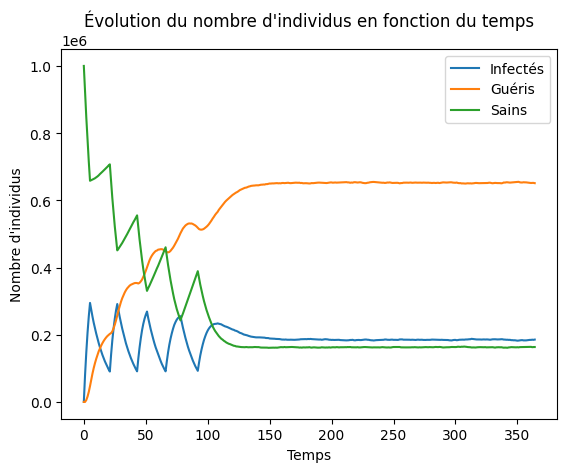

Nombre de confinements nécessaires : 8
Nombre de déconfinements nécessaires : 6
L'état de la population à la fin de l'épidémie :  [0.16335  0.184987 0.651663]
les temps de confinement :  [4, 26, 50, 77]
les temps de déconfinement :  [20, 42, 65, 91]


In [91]:
# Paramètres de la simulation
population = 1000000  # Taille de l'échantillon

final_state, num_containments, num_uncontainments,infected_counts,recovered_counts,susceptible_counts,t_conf,t_deconf = simulate_containment(transition_matrix, containment_matrix, initial_state, population, duration)

# Afficher le graphe des évolutions
_,ax = plt.subplots()
ax.plot(range(duration), infected_counts, label='Infectés')
ax.plot(range(duration), recovered_counts, label='Guéris')
ax.plot(range(duration), susceptible_counts, label='Sains')


plt.xlabel('Temps')
plt.ylabel('Nombre d\'individus')
plt.title('Évolution du nombre d\'individus en fonction du temps')
plt.legend()
plt.show()

print("Nombre de confinements nécessaires :", num_containments)
print("Nombre de déconfinements nécessaires :", num_uncontainments)
print("L'état de la population à la fin de l'épidémie : ",final_state)
print("les temps de confinement : ",t_conf)
print("les temps de déconfinement : ",t_deconf)


Pour le cas de 1 000 000 d'habitants nous observons que le système confinement/déconfinement est plus efficace car au bout de 110 jours environs l'épidémie est maîtriser. Cela est beaucoup plus rapide que des 150 jours vu précédement avec 10 000 habitants.

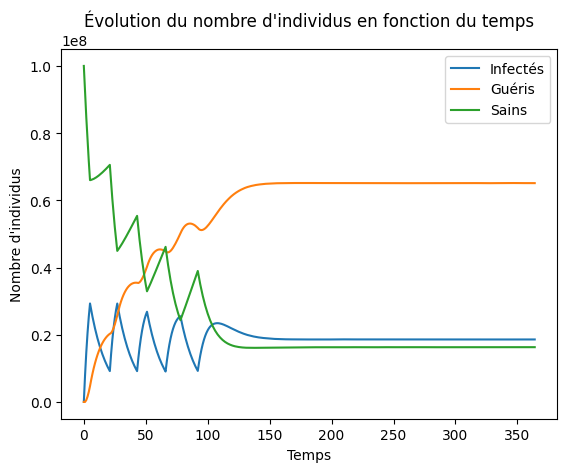

Nombre de confinements nécessaires : 8
Nombre de déconfinements nécessaires : 6
L'état de la population à la fin de l'épidémie :  [0.16292433 0.18595961 0.65111606]
les temps de confinement :  [4, 26, 50, 77]
les temps de déconfinement :  [20, 42, 65, 91]


In [92]:
# Paramètres de la simulation
population = 100000000  # Taille de l'échantillon

final_state, num_containments, num_uncontainments,infected_counts,recovered_counts,susceptible_counts,t_conf,t_deconf = simulate_containment(transition_matrix, containment_matrix, initial_state, population, duration)

# Afficher le graphe des évolutions
_,ax = plt.subplots()
ax.plot(range(duration), infected_counts, label='Infectés')
ax.plot(range(duration), recovered_counts, label='Guéris')
ax.plot(range(duration), susceptible_counts, label='Sains')


plt.xlabel('Temps')
plt.ylabel('Nombre d\'individus')
plt.title('Évolution du nombre d\'individus en fonction du temps')
plt.legend()
plt.show()

print("Nombre de confinements nécessaires :", num_containments)
print("Nombre de déconfinements nécessaires :", num_uncontainments)
print("L'état de la population à la fin de l'épidémie : ",final_state)
print("les temps de confinement : ",t_conf)
print("les temps de déconfinement : ",t_deconf)


Nous pouvons donc conclure que le système confinement/déconfinement est très efficace pour des populations importantes. De plus nous pouvons observer qu'il faut environ 7 à 8 confinement/déconfinement pour contenir l'épidémie et l'éradiquer.

# 5.Discussion

# 5.1 remarques/critiques sur les modèles utilisés

Les modèles que nous avons utilisés présentent des limitations importantes en termes de précision, car ils ne tiennent pas compte plusieurs caractéristiques qui peuvent influencer la propagation d'une épidémie. Parmi ces aspects non pris en compte, il y a le sexe des individus, sachant que les hommes ont souvent une probabilité plus élevée de contracter la maladie par rapport aux femmes. De plus, l'âge joue un rôle crucial, car les jeunes peuvent guérir plus rapidement que les personnes âgées. Le lieu de résidence aurait également dû être pris en  considération, car la propagation de l'épidémie varie en fonction de la densité de la population, des conditions de vie et de l'accessibilité aux soins de santé. En outre, la présence d'autres maladies préexistantes, aurait dû être intégrée dans le modèle, car les personnes souffrant déjà de problèmes de santé sont souvent plus vulnérables et susceptibles d'être gravement affectées. Ces facteurs permettent de mieux comprendre la dynamique de la propagation de la maladie et ainsi élaborer des stratégies de confinement et de déconfinement plus efficaces.